
[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/YichenShen0103/CUMCM-25C/blob/main/problem1.ipynb)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import pearsonr, spearmanr
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")

In [2]:
# read in data
url = 'https://raw.githubusercontent.com/YichenShen0103/CUMCM-25C/main/data/data.xlsx'
data = pd.read_excel(url, sheet_name=0)
data.dropna(subset=["检测孕周", "GC含量", "孕妇BMI", "Y染色体浓度"], inplace=True)
data

,序号,孕妇代码,年龄,身高,体重,末次月经,IVF妊娠,检测日期,检测抽血次数,检测孕周,...,Y染色体浓度,X染色体浓度,13号染色体的GC含量,18号染色体的GC含量,21号染色体的GC含量,被过滤掉读段数的比例,染色体的非整倍体,怀孕次数,生产次数,胎儿是否健康
0,1,A001,31,160.0,72.00,2023-02-01 00:00:00,自然受孕,20230429,1,11w+6,...,0.025936,0.038061,0.377069,0.389803,0.399399,0.027484,NaN,1,0,是
1,2,A001,31,160.0,73.00,2023-02-01 00:00:00,自然受孕,20230531,2,15w+6,...,0.034887,0.059572,0.371542,0.384771,0.391706,0.019617,NaN,1,0,是
2,3,A001,31,160.0,73.00,2023-02-01 00:00:00,自然受孕,20230625,3,20w+1,...,0.066171,0.075995,0.377449,0.390582,0.399480,0.022312,NaN,1,0,是
3,4,A001,31,160.0,74.00,2023-02-01 00:00:00,自然受孕,20230716,4,22w+6,...,0.061192,0.052305,0.375613,0.389251,0.397212,0.023280,NaN,1,0,是
4,5,A002,32,149.0,74.00,2023-11-09 00:00:00,自然受孕,20240219,1,13w+6,...,0.059230,0.059708,0.380260,0.393618,0.404868,0.024212,NaN,2,1,否
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1077,1078,A266,30,159.0,83.35,2022-12-29,自然受孕,2023-05-02 00:00:00,4,17w+5,...,0.099052,0.056686,0.376861,0.389914,0.397090,0.017951,T18,1,0,是
1078,1079,A267,28,155.0,73.76,2023-02-25,自然受孕,2023-05-17 00:00:00,1,11w+4,...,0.098706,0.023663,0.377597,0.387901,0.404293,0.022549,T21,1,0,是
1079,1080,A267,28,155.0,74.06,2023-02-25,自然受孕,2023-05-24 00:00:00,2,12w+4,...,0.102088,0.080264,0.379041,0.391748,0.400433,0.021330,NaN,1,0,是
1080,1081,A267,28,155.0,74.74,2023-02-25,自然受孕,2023-05-31 00:00:00,3,13w+4,...,0.109855,0.074050,0.379107,0.388544,0.401030,0.022013,NaN,1,0,是


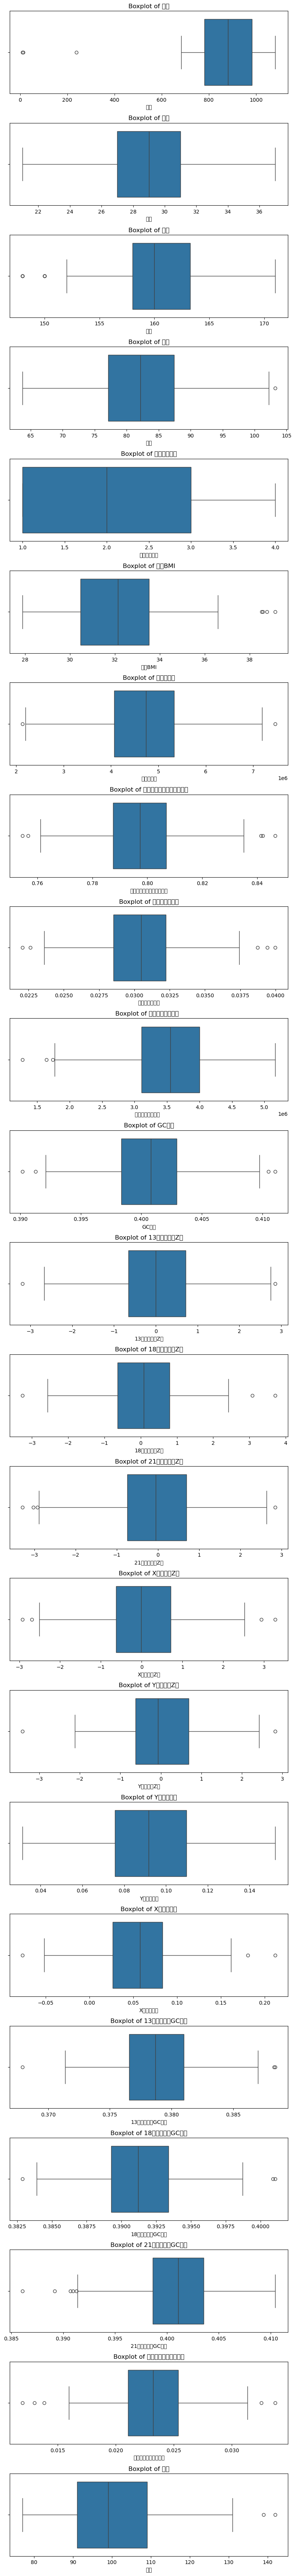

,孕天,Y染色体浓度,X染色体浓度,13号染色体的GC含量,18号染色体的GC含量,21号染色体的GC含量,GC含量,孕妇BMI
237,86,0.046907,0.020597,0.374986,0.387093,0.395632,0.395856,35.003199
682,80,0.059017,0.004208,0.375233,0.390173,0.403319,0.403030,30.375877
683,125,0.061642,0.102574,0.375121,0.393405,0.404703,0.400423,30.471110
686,88,0.072399,0.000973,0.378107,0.390603,0.399384,0.400928,31.320929
687,95,0.073331,0.061949,0.377341,0.386596,0.396658,0.399824,31.354737
...,...,...,...,...,...,...,...,...
1077,124,0.099052,0.056686,0.376861,0.389914,0.397090,0.402899,32.969881
1078,81,0.098706,0.023663,0.377597,0.387901,0.404293,0.402567,30.703133
1079,88,0.102088,0.080264,0.379041,0.391748,0.400433,0.400457,30.825814
1080,95,0.109855,0.074050,0.379107,0.388544,0.401030,0.398217,31.107551


In [3]:
weeks_days = data["检测孕周"].str.split(r"[wW]", expand=True)
data["孕天"] = weeks_days[0].astype(int) * 7 + weeks_days[1].fillna("0").replace("", "0").astype(int)

# data = data[(0.4 <= data["GC含量"]) & (data["GC含量"] <= 0.6)]

data["检测日期"] = pd.to_datetime(data["检测日期"], format="%Y%m%d")
data["末次月经"] = pd.to_datetime(data["末次月经"], format="%Y-%m-%d")
data["delta_days"] = (data["检测日期"] - data["末次月经"]).dt.days - data["孕天"]
# data = data[(data["delta_days"] >= -7) & (data["delta_days"] <= 7)]
# data = data[abs(data["delta_days"]) <= 3]
data = data[abs(data["delta_days"]) <= 0]
# data = data[abs(data["X染色体的Z值"]) <= 3]
# data = data[abs(data["Y染色体的Z值"]) <= 3]
# data = data[abs(data["18号染色体的Z值"]) <= 3]
# data = data[abs(data["21号染色体的Z值"]) <= 3]
data.drop(columns=["delta_days", "生产次数"], inplace=True)

day_mean = data["孕天"].mean()
day_std = data["孕天"].std()
data = data[(data["孕天"] <= day_mean + 3 * day_std) & (data["孕天"] >= day_mean - 3 * day_std)]

# 筛选数值型列
num_cols = data.select_dtypes(include=['float64', 'int64']).columns

# 设置画布
fig, axes = plt.subplots(nrows=len(num_cols), ncols=1, figsize=(8, 3*len(num_cols)))

for i, col in enumerate(num_cols):
    sns.boxplot(x=data[col], ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

for col in num_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    data = data[(data[col] >= Q1 - 3*IQR) & (data[col] <= Q3 + 3*IQR)]

mod_df = data[["孕天","Y染色体浓度",'X染色体浓度', '13号染色体的GC含量', '18号染色体的GC含量', '21号染色体的GC含量','GC含量', '孕妇BMI', "孕妇代码"]]
data = data[["孕天","Y染色体浓度",'X染色体浓度', '13号染色体的GC含量', '18号染色体的GC含量', '21号染色体的GC含量','GC含量', '孕妇BMI']]

# data["tmp"] = data["孕妇代码"] + str(data["检测日期"])
# data = data.groupby(["tmp"], as_index=False)[["孕天", "孕妇BMI","Y染色体浓度"]].mean()
# data.drop_duplicates(subset=["tmp"], keep="last", inplace=True)

# data["孕天"] = (data["孕天"] - day_mean) / day_std
# data["孕妇BMI"] = (data["孕妇BMI"] - data["孕妇BMI"].mean()) / data["孕妇BMI"].std()
# data["Y染色体浓度"] = (data["Y染色体浓度"] - data["Y染色体浓度"].mean()) / data["Y染色体浓度"].std()

# data["孕天"] = (data["孕天"] - data["孕天"].min()) / (data["孕天"].max() - data["孕天"].min())
# data["Y染色体浓度"] = (data["Y染色体浓度"] - data["Y染色体浓度"].min()) / (data["Y染色体浓度"].max() - data["Y染色体浓度"].min())
# data["孕妇BMI"] = ( data["孕妇BMI"] - data["孕妇BMI"].min()) / (data["孕妇BMI"].max() - data["孕妇BMI"].min())

data

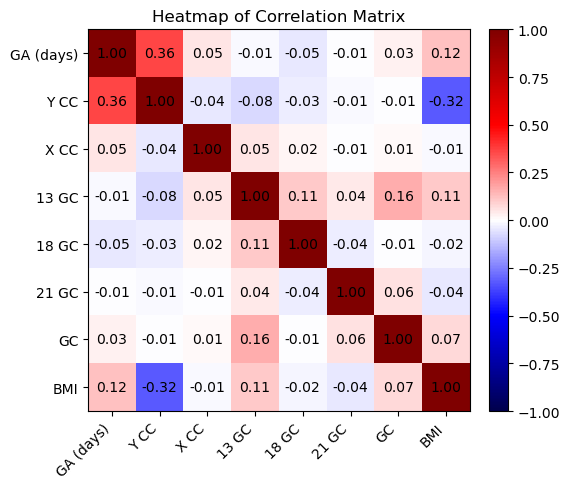

In [4]:
dictionary = {
    "孕天": "GA (days)",
    "孕妇BMI": "BMI",
    "Y染色体浓度": "Y CC",
    "X染色体浓度": "X CC",
    "13号染色体的GC含量": "13 GC",
    "18号染色体的GC含量": "18 GC",
    "21号染色体的GC含量": "21 GC",
    "GC含量": "GC"
}

corr = data.corr()

fig, ax = plt.subplots(figsize=(6, 5))
cax = ax.imshow(corr, cmap="seismic", vmin=-1, vmax=1)

# 添加颜色条
fig.colorbar(cax, ax=ax, fraction=0.046, pad=0.04)

# 设置坐标轴刻度和标签
ax.set_xticks(np.arange(len(corr)))
ax.set_yticks(np.arange(len(corr)))
ax.set_xticklabels([dictionary[col] for col in corr.columns], rotation=45, ha="right")
ax.set_yticklabels([dictionary[col] for col in corr.columns])

# 在格子里添加数值
for i in range(len(corr)):
    for j in range(len(corr)):
        ax.text(j, i, f"{corr.iloc[i, j]:.2f}",
                ha="center", va="center", color="black")

ax.set_title("Heatmap of Correlation Matrix")
plt.tight_layout()
plt.show()

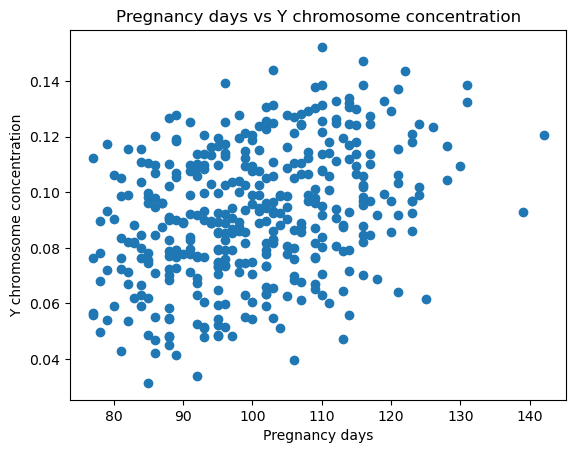

In [5]:
plt.scatter(data["孕天"], data["Y染色体浓度"])
plt.xlabel("Pregnancy days")
plt.ylabel("Y chromosome concentration")
plt.title("Pregnancy days vs Y chromosome concentration")
plt.show()

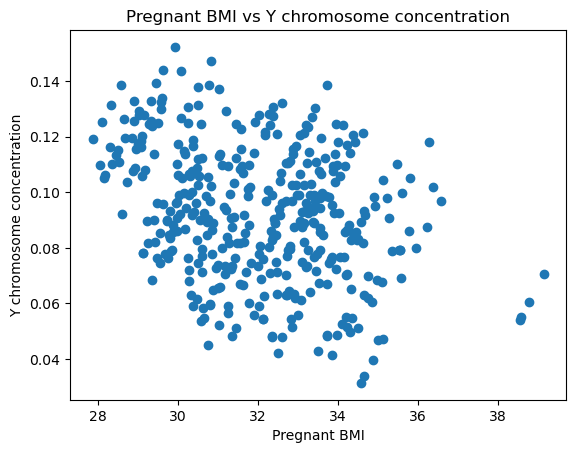

In [6]:
plt.scatter(data["孕妇BMI"], data["Y染色体浓度"])
plt.xlabel("Pregnant BMI")
plt.ylabel("Y chromosome concentration")
plt.title("Pregnant BMI vs Y chromosome concentration")
plt.show()

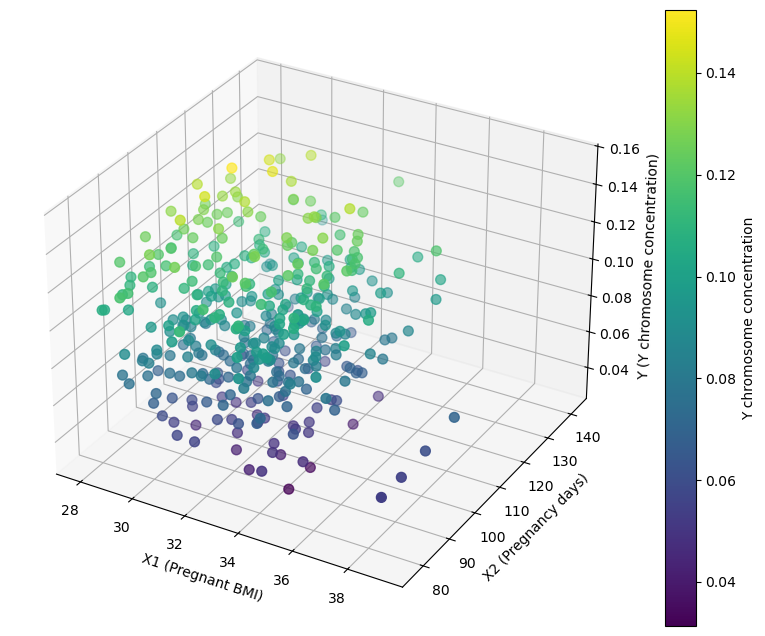

In [7]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")

# 用颜色表现 Y 的大小
sc = ax.scatter(data["孕妇BMI"], data["孕天"], data["Y染色体浓度"], c=data["Y染色体浓度"], cmap="viridis", s=50)

ax.set_xlabel("X1 (Pregnant BMI)")
ax.set_ylabel("X2 (Pregnancy days)")
ax.set_zlabel("Y (Y chromosome concentration)")
plt.colorbar(sc, label="Y chromosome concentration")
plt.show()

In [8]:
Y = data["Y染色体浓度"]
X1 = data["孕妇BMI"]
X2 = np.log(data["孕天"])
print("X1: BMI, X2: log(孕周), Y: Y染色体浓度")

corr, p_value = pearsonr(X1, Y)
corr_spearman, p_value_spearman = spearmanr(X1, Y)
print("X1, Y person r=" , corr , " p=", p_value)
print("X1, Y spearman r=" , corr_spearman , " p=", p_value_spearman)

corr, p_value = pearsonr(X2, Y)
corr_spearman, p_value_spearman = spearmanr(X2, Y)
print("X2, Y person r=" , corr , " p=", p_value)
print("X2, Y spearman r=" , corr_spearman , " p=", p_value_spearman)

X1: BMI, X2: log(孕周), Y: Y染色体浓度
X1, Y person r= -0.32242676423290034  p= 4.4295585326752397e-11
X1, Y spearman r= -0.2967692575488948  p= 1.55575829227486e-09
X2, Y person r= 0.3600977066645361  p= 1.249527240235203e-13
X2, Y spearman r= 0.34963887390629533  p= 6.908340268572778e-13


=== GAM模型效果评估 ===
训练集 R²: 0.3395
测试集 R²: 0.3307
训练集 RMSE: 0.0197
测试集 RMSE: 0.0180
训练集 MAE: 0.0159
测试集 MAE: 0.0143

=== GAM模型统计指标 ===
可用的统计属性: ['n_samples', 'm_features', 'edof_per_coef', 'edof', 'scale', 'cov', 'se', 'AIC', 'AICc', 'pseudo_r2', 'GCV', 'UBRE', 'loglikelihood', 'deviance', 'p_values']
AIC: 707793.8251
GCV: 0.000473
Pseudo R²: OrderedDict({'explained_deviance': np.float64(0.33950211725322377), 'McFadden': np.float64(0.6591177827005947), 'McFadden_adj': np.float64(0.34084316224252365)})
有效自由度: 20.97
解释方差比例: 0.3395


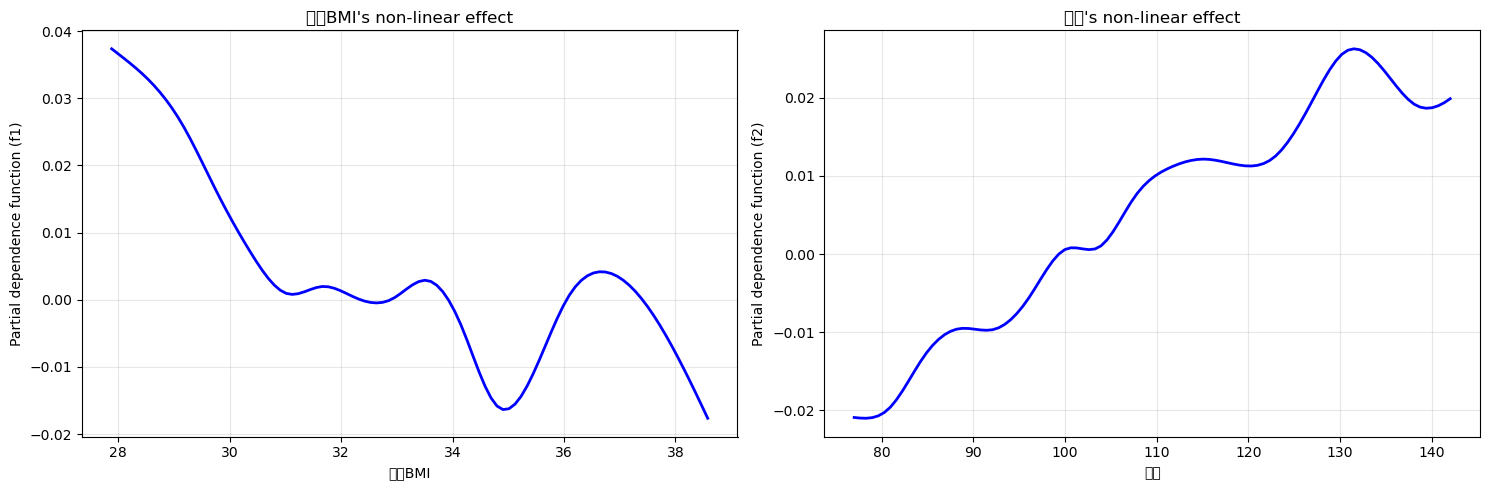

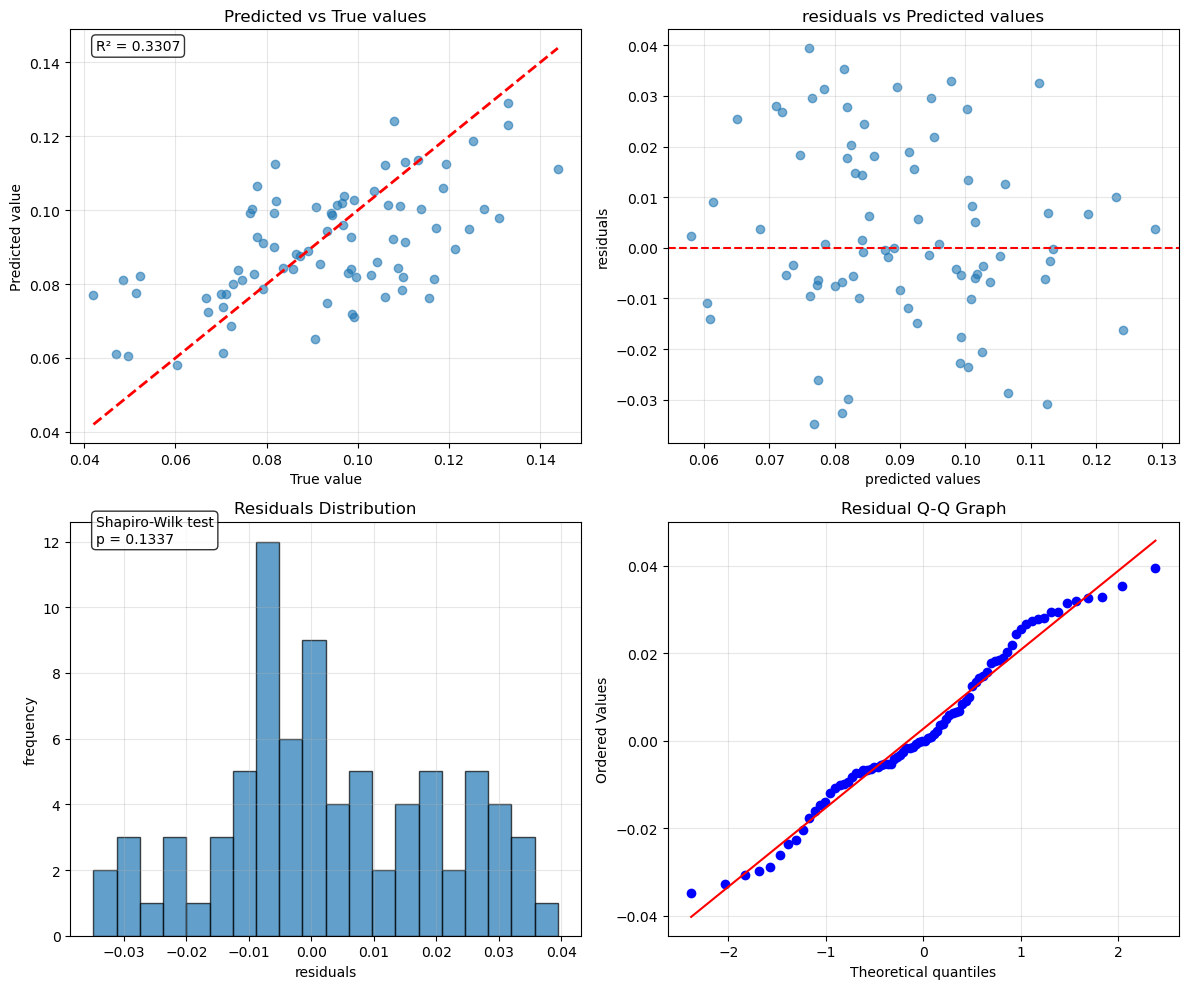


=== 模型显著性检验 ===
F统计量: 80.9565
p值: 1.1102e-16
模型显著 (α=0.05)

=== 残差正态性检验 ===
Shapiro-Wilk统计量: 0.9758
Shapiro-Wilk p值: 0.1337
残差服从正态分布 (α=0.05)

=== 模型总结 ===
• 模型在训练集上的R²为0.3395，在测试集上的R²为0.3307
• 测试集RMSE为0.0180
• 模型整体显著
• 残差服从正态分布假设


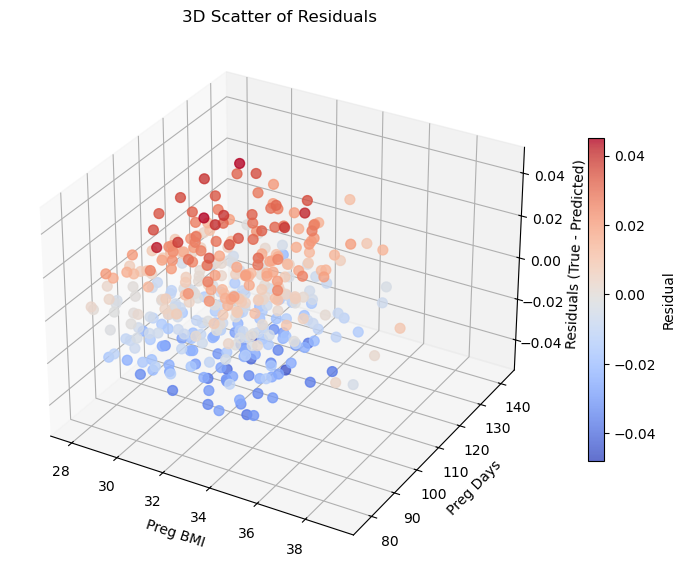

In [9]:
!pip install pygam
from pygam import LinearGAM, s
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np

# 准备数据
X = data[["孕妇BMI", "孕天"]].values
y = data["Y染色体浓度"].values

# 分割训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练GAM模型
gam = LinearGAM(s(0) + s(1)).fit(X_train, y_train)

# 预测
y_pred_train = gam.predict(X_train)
y_pred_test = gam.predict(X_test)

print("=== GAM模型效果评估 ===")
print(f"训练集 R²: {r2_score(y_train, y_pred_train):.4f}")
print(f"测试集 R²: {r2_score(y_test, y_pred_test):.4f}")
print(f"训练集 RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train)):.4f}")
print(f"测试集 RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test)):.4f}")
print(f"训练集 MAE: {mean_absolute_error(y_train, y_pred_train):.4f}")
print(f"测试集 MAE: {mean_absolute_error(y_test, y_pred_test):.4f}")

print(f"\n=== GAM模型统计指标 ===")
print("可用的统计属性:", list(gam.statistics_.keys()))

# 安全地获取统计指标
stats = gam.statistics_
if 'AIC' in stats:
    print(f"AIC: {stats['AIC']:.4f}")
if 'GCV' in stats:
    print(f"GCV: {stats['GCV']:.6f}")
if 'pseudo_r2' in stats:
    print(f"Pseudo R²: {stats['pseudo_r2']}")
if 'edof' in stats:
    print(f"有效自由度: {stats['edof']:.2f}")

# 计算解释方差比例
explained_variance_ratio = r2_score(y_train, y_pred_train)
print(f"解释方差比例: {explained_variance_ratio:.4f}")

# 查看每个变量的非线性效果
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
feature_names = ["孕妇BMI", "孕天"]

for i, term in enumerate(gam.terms):
    if term.isintercept:
        continue
    XX = gam.generate_X_grid(term=i)
    pdep = gam.partial_dependence(term=i, X=XX)
    axes[i].plot(XX[:, i], pdep, 'b-', linewidth=2)
    
    axes[i].set_xlabel(feature_names[i])
    axes[i].set_ylabel(f'Partial dependence function (f{i+1})')
    axes[i].set_title(f'{feature_names[i]}\'s non-linear effect')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 残差分析
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 1. 预测值 vs 真实值
axes[0,0].scatter(y_test, y_pred_test, alpha=0.6)
axes[0,0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0,0].set_xlabel('True value')
axes[0,0].set_ylabel('Predicted value')
axes[0,0].set_title('Predicted vs True values')
axes[0,0].grid(True, alpha=0.3)

# 计算R²
r2_test = r2_score(y_test, y_pred_test)
axes[0,0].text(0.05, 0.95, f'R² = {r2_test:.4f}', transform=axes[0,0].transAxes, 
               bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# 2. 残差 vs 预测值
residuals = y_test - y_pred_test
axes[0,1].scatter(y_pred_test, residuals, alpha=0.6)
axes[0,1].axhline(y=0, color='r', linestyle='--')
axes[0,1].set_xlabel('predicted values')
axes[0,1].set_ylabel('residuals')
axes[0,1].set_title('residuals vs Predicted values')
axes[0,1].grid(True, alpha=0.3)

# 3. 残差分布直方图
axes[1,0].hist(residuals, bins=20, alpha=0.7, edgecolor='black')
axes[1,0].set_xlabel('residuals')
axes[1,0].set_ylabel('frequency')
axes[1,0].set_title('Residuals Distribution')
axes[1,0].grid(True, alpha=0.3)

# 添加正态性统计
from scipy.stats import shapiro
shapiro_stat, shapiro_p = shapiro(residuals)
axes[1,0].text(0.05, 0.95, f'Shapiro-Wilk test\np = {shapiro_p:.4f}', 
               transform=axes[1,0].transAxes, bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# 4. Q-Q图
from scipy import stats
stats.probplot(residuals, dist="norm", plot=axes[1,1])
axes[1,1].set_title('Residual Q-Q Graph')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 模型显著性检验
print(f"\n=== 模型显著性检验 ===")
n = len(y_train)
k = 2  # 两个变量
ss_res = np.sum((y_train - y_pred_train)**2)
ss_tot = np.sum((y_train - np.mean(y_train))**2)
ss_reg = ss_tot - ss_res

mse_reg = ss_reg / k
mse_res = ss_res / (n - k - 1)
f_stat = mse_reg / mse_res

from scipy.stats import f
p_value = 1 - f.cdf(f_stat, k, n - k - 1)

print(f"F统计量: {f_stat:.4f}")
print(f"p值: {p_value:.4e}")
print(f"模型{'显著' if p_value < 0.05 else '不显著'} (α=0.05)")

# 残差正态性检验
print(f"\n=== 残差正态性检验 ===")
print(f"Shapiro-Wilk统计量: {shapiro_stat:.4f}")
print(f"Shapiro-Wilk p值: {shapiro_p:.4f}")
print(f"残差{'服从' if shapiro_p > 0.05 else '不服从'}正态分布 (α=0.05)")

print(f"\n=== 模型总结 ===")
print(f"• 模型在训练集上的R²为{r2_score(y_train, y_pred_train):.4f}，在测试集上的R²为{r2_score(y_test, y_pred_test):.4f}")
print(f"• 测试集RMSE为{np.sqrt(mean_squared_error(y_test, y_pred_test)):.4f}")
print(f"• 模型整体{'显著' if p_value < 0.05 else '不显著'}")
print(f"• 残差{'服从' if shapiro_p > 0.05 else '不服从'}正态分布假设")

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# 残差
y_pred = gam.predict(X)
residuals = y - y_pred

# 3D 散点图
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(
    X[:, 0],  # 孕妇BMI
    X[:, 1],  # 孕天
    residuals,     # 残差
    c=residuals, cmap="coolwarm", s=50, alpha=0.8
)

ax.set_xlabel("Preg BMI")
ax.set_ylabel("Preg Days")
ax.set_zlabel("Residuals (True - Predicted)")
ax.set_title("3D Scatter of Residuals")

# 颜色条
plt.colorbar(sc, ax=ax, shrink=0.6, label="Residual")
plt.show()

                            OLS Regression Results                            
Dep. Variable:                 Y染色体浓度   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     71.88
Date:                Sun, 07 Sep 2025   Prob (F-statistic):           2.39e-27
Time:                        00:47:32   Log-Likelihood:                 983.94
No. Observations:                 398   AIC:                            -1962.
Df Residuals:                     395   BIC:                            -1950.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1304      0.040     -3.250      0.0

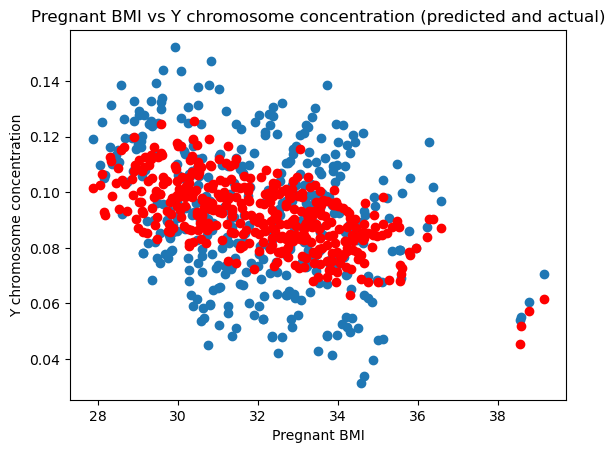

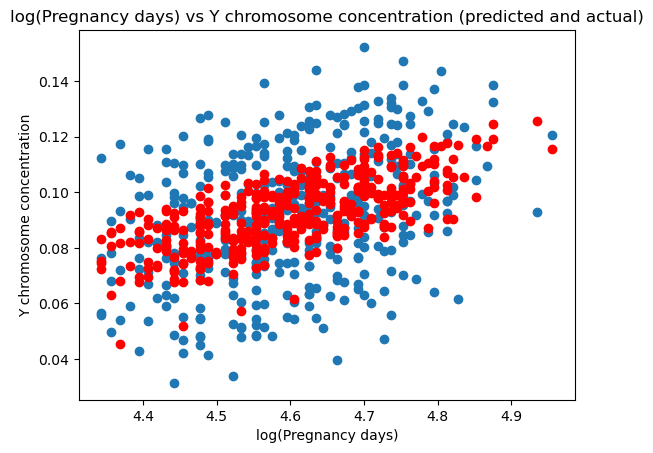

In [10]:
# 假设 df 是你的数据框，y是因变量，X是自变量列表
data["log孕天"] = np.log(data["孕天"])
X = data[['孕妇BMI', 'log孕天']]
y = data['Y染色体浓度']

# 添加截距项
X = sm.add_constant(X)

# 拟合OLS模型
model = sm.OLS(y, X).fit()

# 输出回归结果
print(model.summary())

plt.scatter(data["孕妇BMI"], data["Y染色体浓度"])
plt.scatter(data["孕妇BMI"], model.predict(X), color='red')
plt.xlabel("Pregnant BMI")
plt.ylabel("Y chromosome concentration")
plt.title("Pregnant BMI vs Y chromosome concentration (predicted and actual)")
plt.show()

plt.scatter(data["log孕天"], data["Y染色体浓度"])
plt.scatter(data["log孕天"], model.predict(X), color='red')
plt.xlabel("log(Pregnancy days)")
plt.ylabel("Y chromosome concentration")
plt.title("log(Pregnancy days) vs Y chromosome concentration (predicted and actual)")
plt.show()

In [11]:
col_map_cn = {
    "孕妇代码": "mother_id",
    "检测孕周": "gestational_age",
    "孕妇BMI": "bmi",
    "年龄": "age",
    "Y染色体浓度": "y_concentration",
    "检测日期": "test_date",
    "末次月经": "last_menstrual_period",
    "身高": "height",
    "体重": "weight",
    "在参考基因组上比对的比例": "mapping_ratio",
    "GC含量": "GC",
    "孕天": "gestational_weeks"
}
mod_df.rename(columns=col_map_cn, inplace=True)
mod_df["y_clip"] = mod_df["y_concentration"].clip(lower=1e-6, upper=1 - 1e-6)
mod_df["y_logit"] = np.log(mod_df["y_clip"] / (1 - mod_df["y_clip"]))
mod_df['bmi'] = (mod_df['bmi'] - mod_df['bmi'].mean()) / mod_df['bmi'].std()
mod_df['gestational_weeks'] = (mod_df['gestational_weeks'] - mod_df['gestational_weeks'].mean()) / mod_df['gestational_weeks'].std()
formula = "y_logit ~ bmi + gestational_weeks"
md = smf.mixedlm(
    formula, mod_df, groups=mod_df["mother_id"], re_formula="~gestational_weeks"
)
mdf = md.fit(reml=False, method="lbfgs", maxiter=2000)
print(mdf.summary())

y_true = mod_df["y_logit"].values
y_pred = mdf.fittedvalues.values
ss_res = np.sum((y_true - y_pred) ** 2)
ss_tot = np.sum((y_true - y_true.mean()) ** 2)
r_squared = 1 - ss_res / ss_tot
print(f"R-squared: {r_squared:.4f}")

                  Mixed Linear Model Regression Results
Model:                   MixedLM       Dependent Variable:       y_logit 
No. Observations:        398           Method:                   ML      
No. Groups:              101           Scale:                    0.0001  
Min. group size:         1             Log-Likelihood:           594.7008
Max. group size:         4             Converged:                Yes     
Mean group size:         3.9                                             
-------------------------------------------------------------------------
                              Coef.  Std.Err.    z    P>|z| [0.025 0.975]
-------------------------------------------------------------------------
Intercept                     -2.333    0.081 -28.876 0.000 -2.491 -2.174
bmi                            0.658    0.012  55.453 0.000  0.634  0.681
gestational_weeks              0.010    0.004   2.556 0.011  0.002  0.018
Group Var                      0.659   10.825           

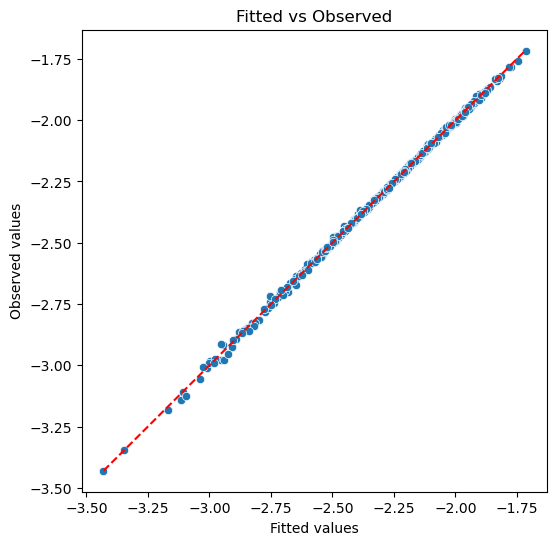

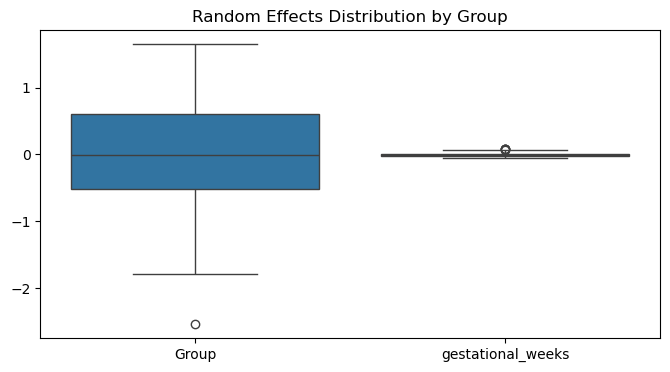

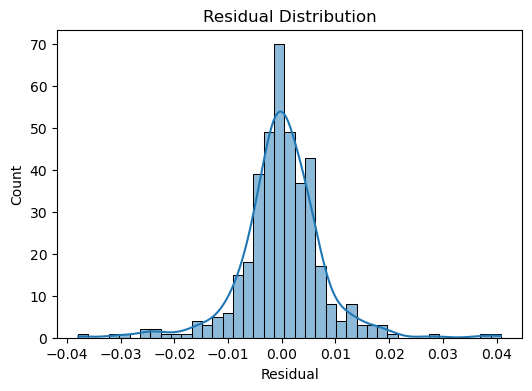

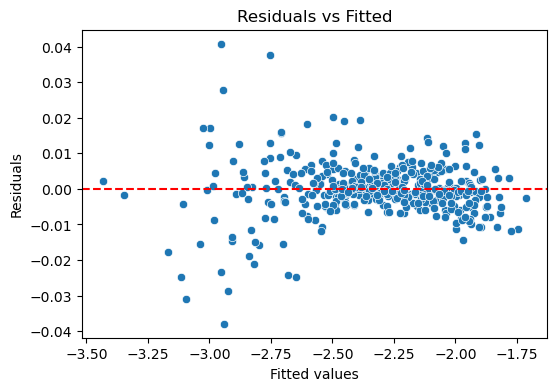

In [12]:
# 假设你的原始数据是 df，列名为 'y_logit', 'bmi', 'gestational_weeks', 'mother_id'
# 模型拟合值
mod_df['fitted'] = mdf.fittedvalues
mod_df['residual'] = mod_df['y_logit'] - mod_df['fitted']

# 1. 拟合 vs 实测值
plt.figure(figsize=(6,6))
sns.scatterplot(x='fitted', y='y_logit', data=mod_df)
plt.plot([mod_df['y_logit'].min(), mod_df['y_logit'].max()],
         [mod_df['y_logit'].min(), mod_df['y_logit'].max()],
         color='red', linestyle='--')
plt.xlabel("Fitted values")
plt.ylabel("Observed values")
plt.title("Fitted vs Observed")
plt.show()

# 2. 随机效应分布
re_df = pd.DataFrame(mdf.random_effects).T  # 转为 DataFrame
plt.figure(figsize=(8,4))
sns.boxplot(data=re_df)
plt.title("Random Effects Distribution by Group")
plt.show()

# 3. 残差分布
plt.figure(figsize=(6,4))
sns.histplot(mod_df['residual'], kde=True)
plt.title("Residual Distribution")
plt.xlabel("Residual")
plt.show()

# 4. 残差 vs 拟合值
plt.figure(figsize=(6,4))
sns.scatterplot(x='fitted', y='residual', data=mod_df)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.show()